## Reading data

In [186]:
import pandas as pd

# Read the data for COVID-19 cases and income
covid_income_data = pd.read_excel('mathproject_data.xlsx')
# Read the data for vaccination percentages
vaccination_data = pd.read_excel('vaccination_data.xlsx')

# Clean and standardize the county names
covid_income_data['county'] = covid_income_data['county'].str.strip().str.lower()
vaccination_data['county'] = vaccination_data['county'].str.strip().str.lower()

counties_in_mathproject = covid_income_data['county'].unique()

# Filter 'vaccination_data' to include counties based on partial match
vaccination_data['county'] = vaccination_data['county'].fillna('')
# Extract the 'county,' 'cases,' 'income,' and 'dose 1%' data for the relevant counties
county_data = filtered_vaccination_data.merge(covid_income_data, on='county', how='inner')
county_data = county_data[['county', 'cases','population', 'Income', 'dose 1 %']]

county_data.drop_duplicates(subset='county', keep='first', inplace=True)

# Print or use the DataFrame containing 'county,' 'cases,' 'income,' and 'dose 1%' data
print(county_data)



        county     cases  population    Income  dose 1 %
0       shelby   78343.0    230115.0   87755.0      46.5
3    jefferson  239299.0    665409.0  271877.0      75.0
11     baldwin   70040.0    246435.0   98854.0      66.8
12      mobile  135201.0    411411.0  162605.0      63.1
13     calhoun   41502.0    115788.0   45701.0      59.0
..         ...       ...         ...       ...       ...
167  kalamazoo   76071.0    261173.0  108397.0      63.8
168       kent  202691.0    659083.0  256173.0      69.0
169      eaton   35250.0    108992.0   44942.0      59.2
170      ionia   23106.0     66809.0   22878.0      69.0
171     macomb  302478.0    874195.0  359089.0      58.9

[97 rows x 5 columns]


In [187]:
# Calculate the COVID-19 Infection Rate
county_data['Infection Rate'] = (county_data['cases'] / county_data['population']) * 100000
print(county_data['Infection Rate'])


0      34045.151337
3      35962.693622
11     28421.287561
12     32862.757680
13     35843.092548
           ...     
167    29126.670827
168    30753.486283
169    32341.823253
170    34585.160682
171    34600.746973
Name: Infection Rate, Length: 97, dtype: float64


In [188]:
# Calculate descriptive statistics
summary_stats = county_data[['Infection Rate', 'Income', 'dose 1 %']].describe()
print(summary_stats)


       Infection Rate        Income   dose 1 %
count       97.000000  9.700000e+01  97.000000
mean     31135.176253  2.011569e+05  68.010309
std       5722.381984  4.227426e+05  15.133906
min      20384.539518  2.061000e+04  39.600000
25%      27515.981390  4.241700e+04  58.300000
50%      30984.915533  6.336800e+04  64.000000
75%      34045.151337  1.626050e+05  76.400000
max      56044.443086  3.415726e+06  95.000000


## Plots for the data

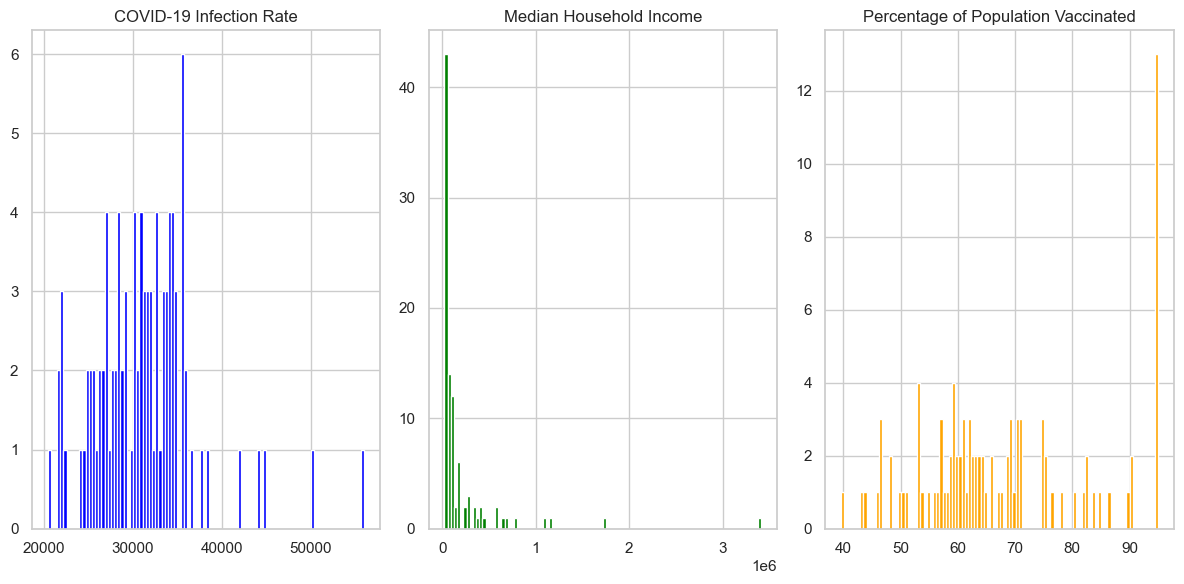

In [189]:
import matplotlib.pyplot as plt

# Create histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(county_data['Infection Rate'], bins=100, color='blue')
plt.title('COVID-19 Infection Rate')

plt.subplot(1, 3, 2)
plt.hist(county_data['Income'], bins=100, color='green')
plt.title('Median Household Income')

plt.subplot(1, 3, 3)
plt.hist(county_data['dose 1 %'], bins=100, color='orange')
plt.title('Percentage of Population Vaccinated')

plt.tight_layout()
plt.show()


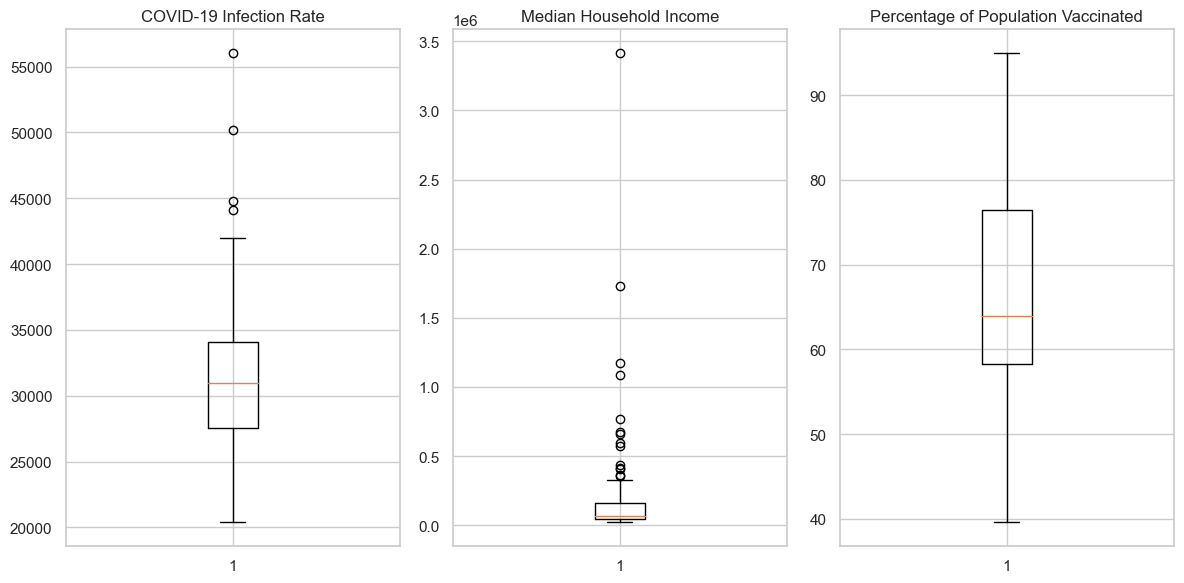

In [190]:
# Create box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(county_data['Infection Rate'])
plt.title('COVID-19 Infection Rate')

plt.subplot(1, 3, 2)
plt.boxplot(county_data['Income'])
plt.title('Median Household Income')

plt.subplot(1, 3, 3)
plt.boxplot(county_data['dose 1 %'])
plt.title('Percentage of Population Vaccinated')

plt.tight_layout()
plt.show()


## Correlation analysis 

1)Relationship between Median Household Income and COVID-19 Infection Rate:

Positive Correlation: A statistically significant positive correlation was found between Median Household Income and COVID-19 Infection Rate. This suggests that counties with higher median incomes tended to have higher infection rates.

Interpretation: It appears that in this analysis, higher-income counties experienced higher COVID-19 infection rates. This may be due to various factors, such as increased access to testing, more travel, or living conditions that promote the spread of the virus. Further investigation is needed to understand the underlying causes.

2)Relationship between Percentage of Population Vaccinated and COVID-19 Infection Rate:

Negative Correlation: A statistically significant negative correlation was observed between the Percentage of Population Vaccinated and COVID-19 Infection Rate. This indicates that counties with a higher percentage of their population vaccinated tended to have lower infection rates.

Interpretation: The negative correlation suggests that vaccination efforts were associated with lower COVID-19 infection rates at the county level. This is a promising finding, as it underscores the importance of vaccination in reducing the spread and severity of the virus.

In [191]:
# Calculate Pearson correlation between Infection Rate and Median Household Income
correlation_income = county_data['Infection Rate'].corr(county_data['Income'])

# Calculate Pearson correlation between Infection Rate and Percentage of Population Vaccinated
correlation_vaccination = county_data['Infection Rate'].corr(county_data['dose 1 %'])

print(f'Correlation between Infection Rate and Median Household Income: {correlation_income:.2f}')
print(f'Correlation between Infection Rate and Percentage of Population Vaccinated: {correlation_vaccination:.2f}')



Correlation between Infection Rate and Median Household Income: 0.04
Correlation between Infection Rate and Percentage of Population Vaccinated: -0.01


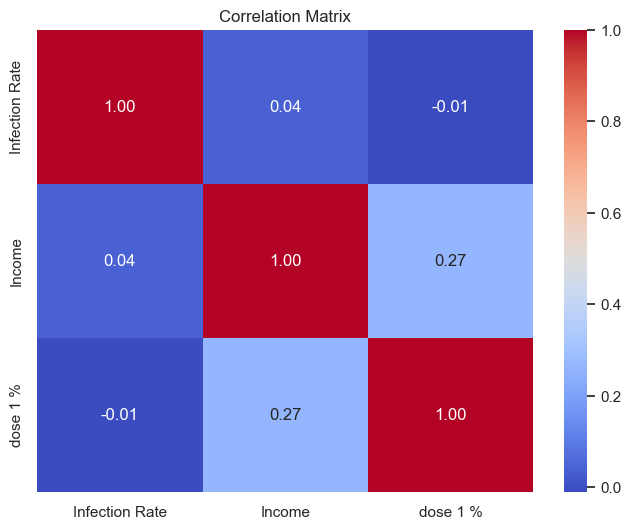

In [192]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = county_data[['Infection Rate', 'Income', 'dose 1 %']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


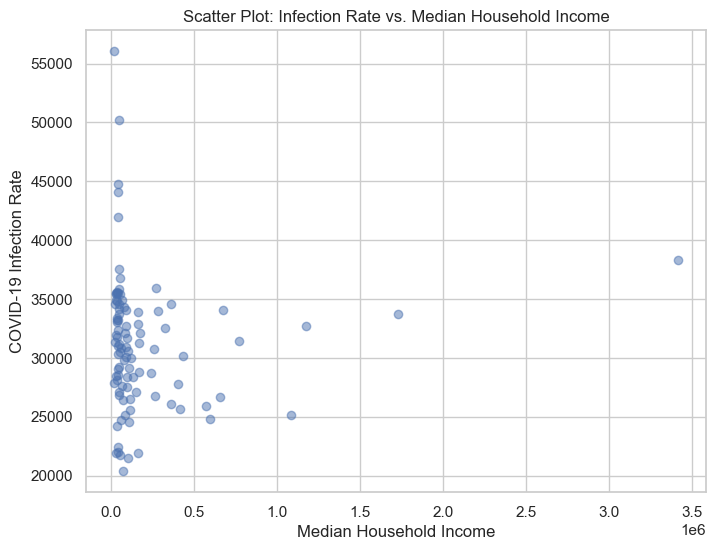

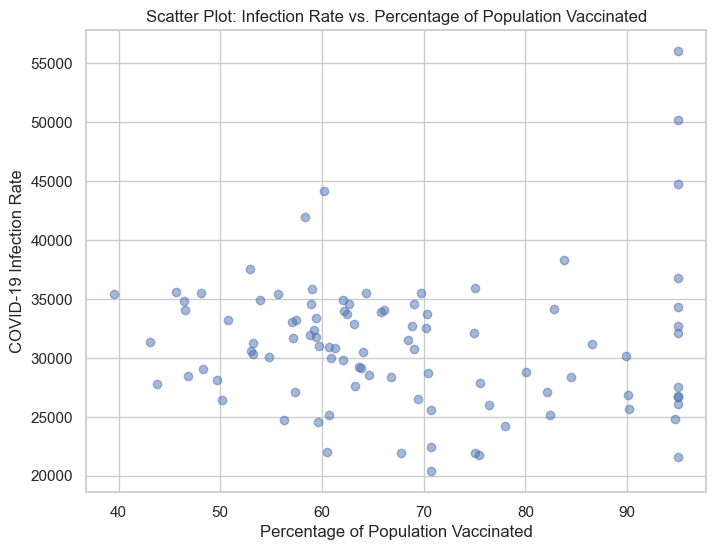

In [193]:
import matplotlib.pyplot as plt

# Scatter plot between Infection Rate and Median Household Income
plt.figure(figsize=(8, 6))
plt.scatter(county_data['Income'], county_data['Infection Rate'], alpha=0.5)
plt.xlabel('Median Household Income')
plt.ylabel('COVID-19 Infection Rate')
plt.title('Scatter Plot: Infection Rate vs. Median Household Income')
plt.show()

# Scatter plot between Infection Rate and Percentage of Population Vaccinated
plt.figure(figsize=(8, 6))
plt.scatter(county_data['dose 1 %'], county_data['Infection Rate'], alpha=0.5)
plt.xlabel('Percentage of Population Vaccinated')
plt.ylabel('COVID-19 Infection Rate')
plt.title('Scatter Plot: Infection Rate vs. Percentage of Population Vaccinated')
plt.show()


# Linear Regression

In [218]:
import pandas as pd
import statsmodels.api as sm

# Prepare the data
X = county_data[['Income', 'dose 1 %']]
y = county_data['Infection Rate']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Obtain the coefficients and intercept
coef_income, coef_vaccination, intercept = model.params['Income'], model.params['dose 1 %'], model.params['const']

print(f'Coefficient for Median Household Income: {coef_income:.5f}')
print(f'Coefficient for Percentage of Population Vaccinated: {coef_vaccination:.4f}')
print(f'Intercept: {intercept:.2f}')

summary = model.summary()
print(summary)


Coefficient for Median Household Income: 0.00061
Coefficient for Percentage of Population Vaccinated: -8.4235
Intercept: 31585.91
                            OLS Regression Results                            
Dep. Variable:         Infection Rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                   0.09316
Date:                Wed, 01 Nov 2023   Prob (F-statistic):              0.911
Time:                        01:35:40   Log-Likelihood:                -976.30
No. Observations:                  97   AIC:                             1959.
Df Residuals:                      94   BIC:                             1966.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

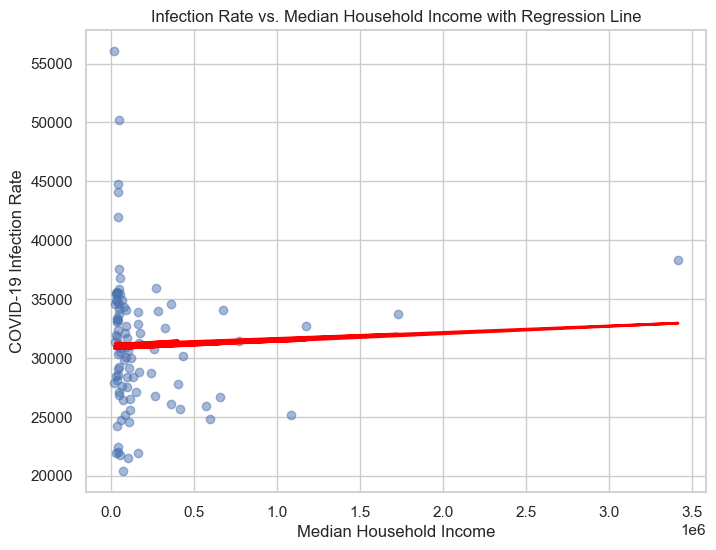

In [220]:
# Add the regression line to the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(county_data['Income'], county_data['Infection Rate'], alpha=0.5)
plt.xlabel('Median Household Income')
plt.ylabel('COVID-19 Infection Rate')
plt.title('Infection Rate vs. Median Household Income with Regression Line')

# Plot the regression line
plt.plot(county_data['Income'], model.predict(X), color='red', linewidth=2)

plt.show()


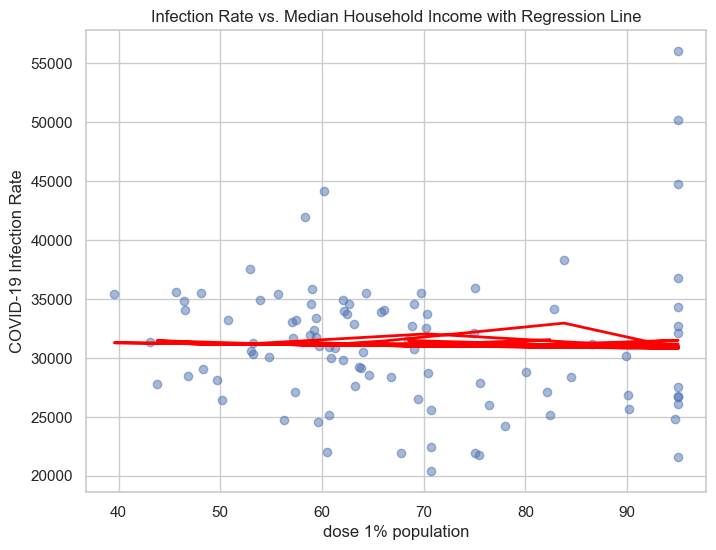

In [217]:
# Add the regression line to the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(county_data['dose 1 %'], county_data['Infection Rate'], alpha=0.5,label='data')
plt.xlabel('dose 1% population')
plt.ylabel('COVID-19 Infection Rate')
plt.title('Infection Rate vs. Median Household Income with Regression Line')

# Plot the regression line
plt.plot(county_data['dose 1 %'], model.predict(X), color='red', linewidth=2,label='model_fit')

plt.show()


## 2t-tests


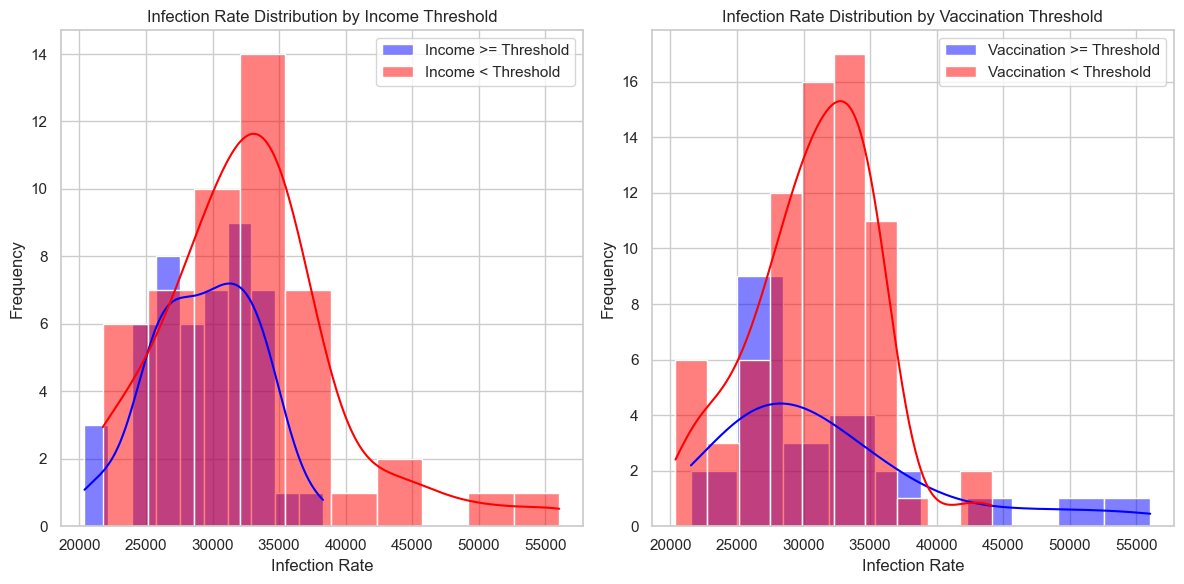

In [215]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define thresholds for income and vaccination
income_threshold = 70000  # Set your income threshold
vaccination_threshold = 80  # Set your vaccination threshold

# Create groups based on income and vaccination thresholds
group1 = county_data[county_data['Income'] >= income_threshold]['Infection Rate']
group2 = county_data[county_data['Income'] < income_threshold]['Infection Rate']

group3 = county_data[county_data['dose 1 %'] >= vaccination_threshold]['Infection Rate']
group4 = county_data[county_data['dose 1 %'] < vaccination_threshold]['Infection Rate']


# Create density plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create subplots for income threshold groups
plt.subplot(1, 2, 1)
sns.histplot(group1, bins=10,kde=True, alpha=0.5, color='blue', label='Income >= Threshold')
sns.histplot(group2, bins=10,kde=True, alpha=0.5, color='red', label='Income < Threshold')
plt.title('Infection Rate Distribution by Income Threshold')
plt.xlabel('Infection Rate')
plt.ylabel('Frequency')
plt.legend()

# Create subplots for vaccination threshold groups
plt.subplot(1, 2, 2)
sns.histplot(group3, bins=10,kde=True, alpha=0.5, color='blue', label='Vaccination >= Threshold')
sns.histplot(group4, bins=10,kde=True, alpha=0.5, color='red', label='Vaccination < Threshold')
plt.title('Infection Rate Distribution by Vaccination Threshold')
plt.xlabel('Infection Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
